In [1]:
# This program will bring in data, manipulate it, and perform some basic analysis

# For this analysis, I will be looking at some biostatistics data from the following URL
# http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets
# Data is from a Stress Echocardiography study conducted by UCLA
# Full Description available here: http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets

# Objective of original study was to predict cardiac events via treatment with a drug
# called dobutamine.  Dobutamine simulates the impact heavy exercise upon the heart, within a 
# population that may not otherwise be able to conduct heavy exercise

# There are four classes of cardiac event that we may wish to predict
# myocardial infarction (MI)
# revascularization by percutaneous transluminal coronary angioplasty (PTCA)
# coronary artery bypass grafting surgery (CABG)
# cardiac death

In [63]:
# Import third-party modules

%matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

In [23]:
# Read in the data
stress = pd.read_csv('/Users/Philip/Documents/Python Scripts/progs/python_scripts/freestyle_eda/input/stressEcho.csv')

# Take a verifying look at this data
print stress.__class__ # make sure it's a pd.df
print "\n"
print stress.head(n = 4) 
list(stress.columns.values) #print out the column names

<class 'pandas.core.frame.DataFrame'>


   Unnamed: 0  bhr  basebp  basedp  pkhr  sbp     dp  dose  maxhr  pctMphr  \
0           1   92     103    9476   114   86   9804    40    100       74   
1           2   62     139    8618   120  158  18960    40    120       82   
2           3   62     139    8618   120  157  18840    40    120       82   
3           4   93     118   10974   118  105  12390    30    118       72   

     ...      newCABG  death  hxofHT  hxofDM     hxofCig  hxofMI  hxofPTCA  \
0    ...            0      0       0       0  non-smoker       1         1   
1    ...            0      0       0       1  non-smoker       1         0   
2    ...            0      0       0       1  non-smoker       1         0   
3    ...            0      0       0       0  non-smoker       0         0   

   hxofCABG  any.event        ecg  
0         0          0     normal  
1         0          1  equivocal  
2         0          1  equivocal  
3         0          0     normal 

['Unnamed: 0',
 'bhr',
 'basebp',
 'basedp',
 'pkhr',
 'sbp',
 'dp',
 'dose',
 'maxhr',
 'pctMphr',
 'mbp',
 'dpmaxdo',
 'dobdose',
 'age',
 'gender',
 'baseEF',
 'dobEF',
 'chestpain',
 'restwma',
 'posSE',
 'newMI',
 'newPTCA',
 'newCABG',
 'death',
 'hxofHT',
 'hxofDM',
 'hxofCig',
 'hxofMI',
 'hxofPTCA',
 'hxofCABG',
 'any.event',
 'ecg']

count    558.000000
mean      67.344086
std       12.049415
min       26.000000
25%       60.000000
50%       69.000000
75%       75.000000
max       93.000000
Name: age, dtype: float64


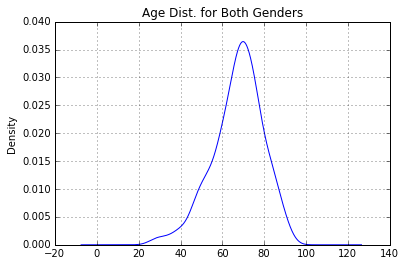

In [39]:
# Let's get a look at how this breaks down demographically - start with age and gender

# Tukey Five-Figure Summary
print stress['age'].describe()
# Plot the distribution
age_plot = stress['age'].plot(kind='kde', title='Age Dist. for Both Genders', grid=True )

<class 'pandas.core.series.Series'>


female    338
male      220
Name: gender, dtype: int64


We have 220 cases in the male dataset
We have 338 cases in the female dataset



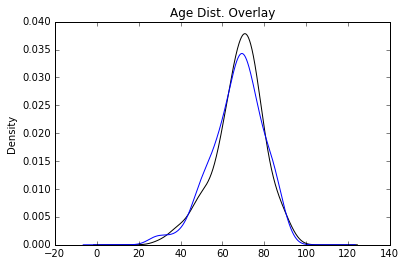

In [65]:
# Now let's see the gender breakdown, and if age varies by gender
print stress['gender'].__class__
print "\n"
print stress['gender'].value_counts()
print "\n"

# Limit down to just the men
men = stress[stress['gender'] == 'male' ]
women = stress[stress['gender'] == 'female' ]

print "We have " + str(men.shape[0]) + " cases in the male dataset"
print "We have " + str(women.shape[0]) + " cases in the female dataset\n"

# let's get KDEs of age for both
men['age'].plot(kind='kde', title='Age Dist. Overlay', grid=True, color='k') #black
women['age'].plot(kind='kde', color='b') #blue



In [70]:
# These look highly similar and roughly normal - let's do a t-test
# conduct Levene's test for equality of variances
print st.levene(men['age'], women['age'] )
levene_p = st.levene(men['age'], women['age'])[1] #keep the p-value



LeveneResult(statistic=1.0580184350023911, pvalue=0.30411482569983866)
